# Data Exploration

## Library Imports

In [141]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.data_manipulation import DataManipulator
from scripts.data_information import DataInfo
from scripts.data_cleaner import DataCleaner


In [ ]:
def make_count_plot(name, ):


In [2]:
import pandas as pd
import lux

# Introduction

## General Description of the Data

# Individual Analysis Of Data

## District Info

### Exploration

In [3]:
districts = pd.read_csv('../data/districts_info.csv')
districts

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
districts_info = DataInfo(districts)
districts_info.get_column_based_missing_percentage()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
districts_info.get_total_missing_values()

The total number of missing values is 442
27.1 % missing values.


442

In [6]:
districts_info.get_numeric_columns()

['district_id']

In [7]:
districts_info.get_object_columns()

['state',
 'locale',
 'pct_black/hispanic',
 'pct_free/reduced',
 'county_connections_ratio',
 'pp_total_raw']

In [8]:
len(districts_info.get_duplicates())

0

### Cleaning

In [9]:
# Fixing wrong list representation
def fix_list(list_item):
    if(type(list_item) == str and list_item[-1] == '['):
        list_item = list_item[:-1] + ']'
        
    return list_item

for col in districts.columns.to_list()[3:]:
    districts[col] = districts[col].apply(lambda x: fix_list(x))

districts


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
# Remove all rows with Null State Values
clean_districts = districts[districts['state'].notnull()]
clean_districts_info = DataInfo(clean_districts)
clean_districts


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
clean_districts_info.get_column_based_missing_percentage()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
clean_districts_info.get_total_missing_values()

The total number of missing values is 100
8.12 % missing values.


100

In [13]:
clean_districts_info.get_dataframe_columns_unique_value_count()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
clean_districts_info.df['state'].unique()


array(['Illinois', 'Utah', 'Wisconsin', 'North Carolina', 'Missouri',
       'Washington', 'Connecticut', 'Massachusetts', 'New York',
       'Indiana', 'Virginia', 'Ohio', 'New Jersey', 'California',
       'District Of Columbia', 'Minnesota', 'Arizona', 'Texas',
       'Tennessee', 'Florida', 'North Dakota', 'New Hampshire',
       'Michigan'], dtype='<U20')

In [15]:
clean_districts_info.df['locale'].unique()


array(['Suburb', 'Rural', 'City', 'Town'], dtype='<U6')

### Visualization

In [38]:
clean_districts

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Count Plots')

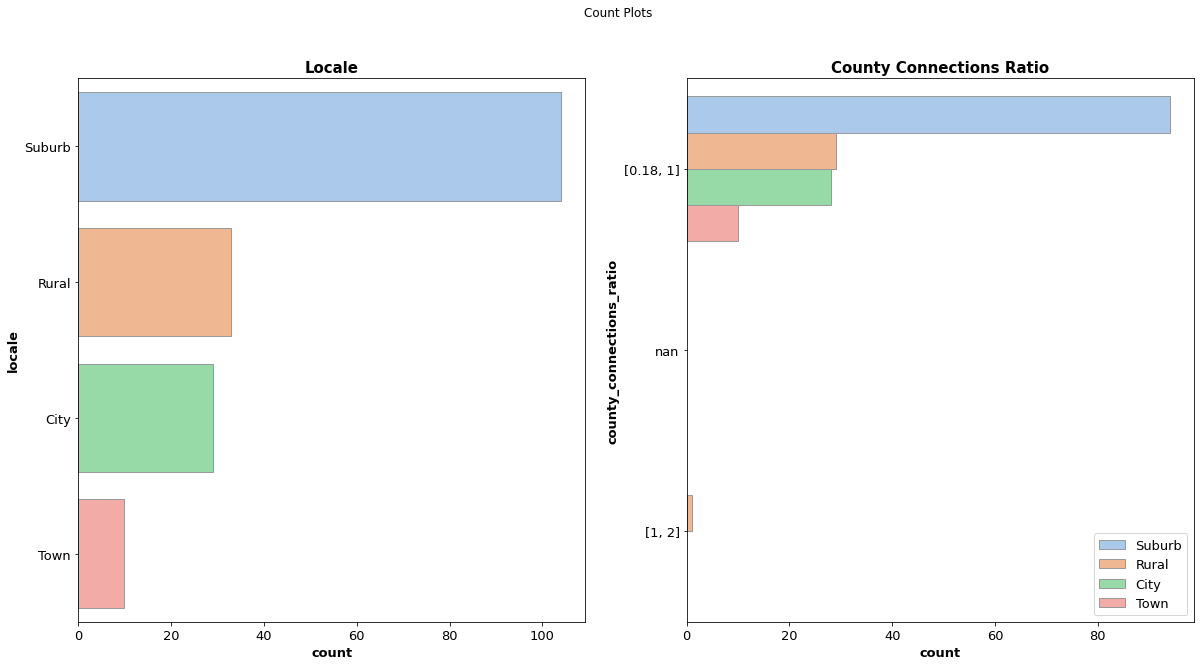

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(y="locale",
            palette="pastel", edgecolor=".6",
            data=clean_districts, ax=ax1)
ax1.set_title('Locale')

sns.countplot(y="county_connections_ratio",
            palette="pastel", edgecolor=".6",
            data=clean_districts, hue='locale', ax=ax2)

ax2.set_title('County Connections Ratio')
ax2.legend(loc='lower right')

plt.suptitle('Count Plots')


Text(0.5, 0.98, 'Count Plots')

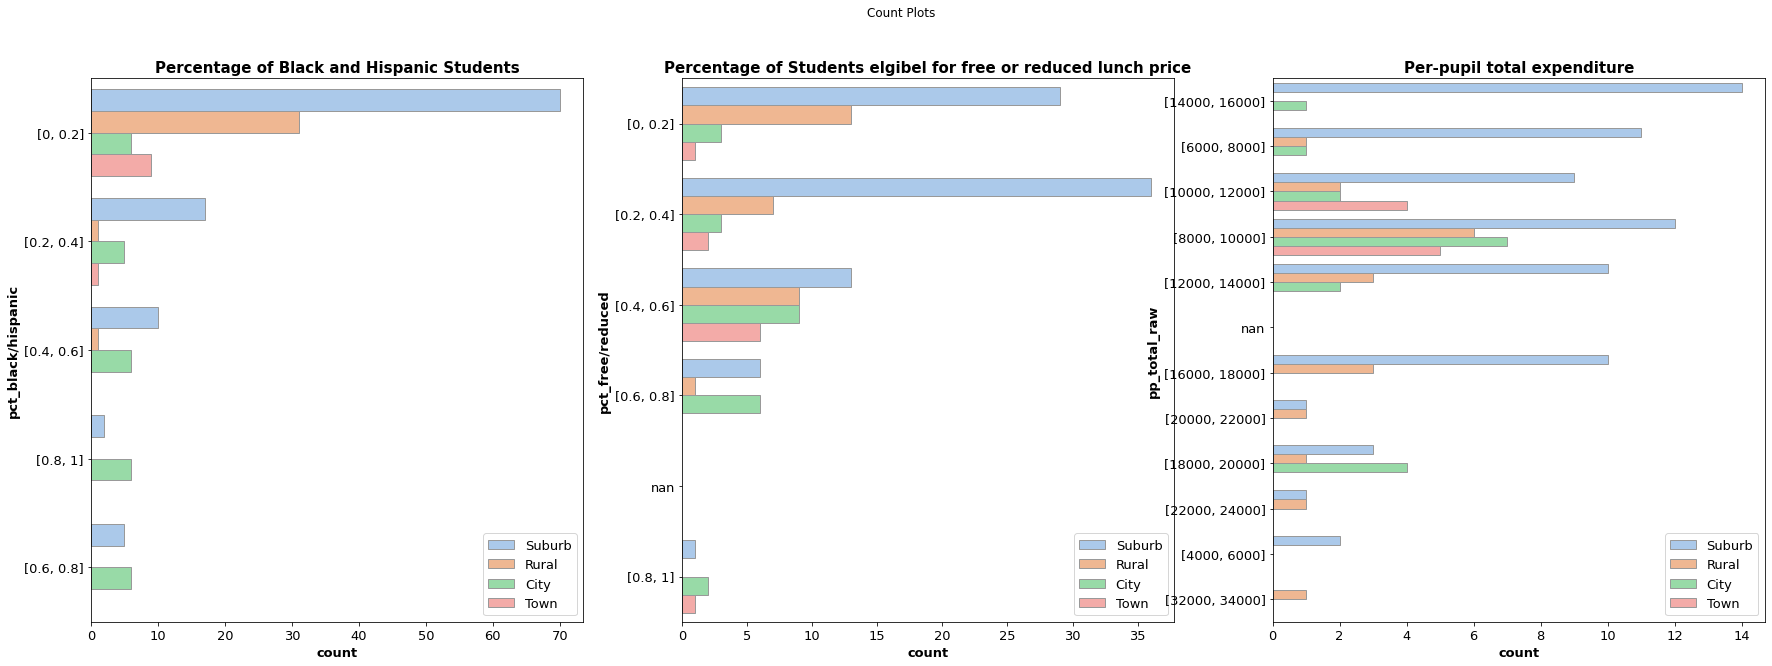

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
sns.countplot(y="pct_black/hispanic",
              palette="pastel", edgecolor=".6",
              data=clean_districts, hue='locale', ax=ax1)
ax1.set_title('Percentage of Black and Hispanic Students')
ax1.legend(loc='lower right')

sns.countplot(y="pct_free/reduced",
              palette="pastel", edgecolor=".6",
              data=clean_districts, hue='locale', ax=ax2)

ax2.set_title('Percentage of Students elgibel for free or reduced lunch price')
ax2.legend(loc='lower right')

sns.countplot(y="pp_total_raw",
              palette="pastel", edgecolor=".6",
              data=clean_districts, hue='locale', ax=ax3)

ax3.set_title('Per-pupil total expenditure')
ax3.legend(loc='lower right')

plt.suptitle('Count Plots')


## Products Info

### Exploration

In [72]:
products = pd.read_csv('../data/products_info.csv')
products


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [73]:
products_info = DataInfo(products)
products_info.get_column_based_missing_percentage()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [74]:
products_info.get_total_missing_values()


The total number of missing values is 41
1.84 % missing values.


41

In [75]:
products_info.get_numeric_columns()

['LP ID']

In [76]:
products_info.get_object_columns()


['URL',
 'Product Name',
 'Provider/Company Name',
 'Sector(s)',
 'Primary Essential Function']

### Visualizations

Text(0.5, 1.0, 'Types of Sectors')

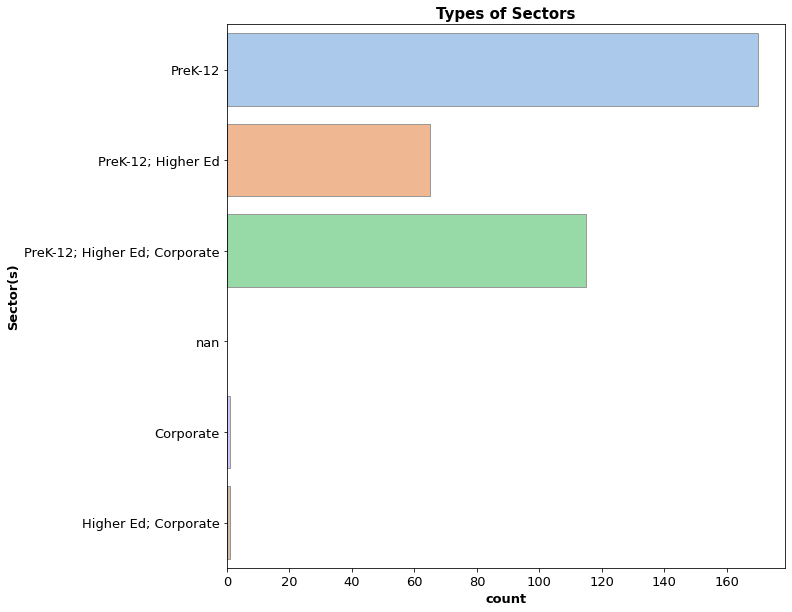

In [109]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
sns.countplot(y=products['Sector(s)'].dropna(),
              palette="pastel", edgecolor=".6",
              data=products, ax=ax1)
ax1.set_title('Types of Sectors')


In [134]:
# Top 15 Provider Companies, and Primary Functionalities
big_prov_comp = pd.DataFrame(products['Provider/Company Name'].value_counts(sort=True, ascending=False)[:15])
big_prov_comp.columns = ['Number of Provided Products']
big_prov_comp


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [137]:
func_use = pd.DataFrame(products['Primary Essential Function'].value_counts(
    sort=True, ascending=False)[:15])
func_use.columns = ['Functionality Use Count']
func_use


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [140]:
products.groupby('Provider/Company Name').get_group('Google LLC')


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Dataset Construction